<a id="0"></a> <br>
Indice 
- [Librerias(Ejecutar 1º)](#1)
- [Primera prueba google](#2)
- [Prueba Psn](#3)
- [Columnas de DF para webscrappear](#4)
- [Código webscrappeo sin necesidad de navegador abierto](#5)
- [Funciones y clases (Ejecutar 2º)](#6)
- [Código principal (Ejecutar 3º)](#7)
- [Inicialización de base de datos](#8)
- [Limpieza df](#9)


<a id="1"></a> <br>
Librerias

In [1]:
import re # Expresiones regulares 
import time
import variables as v
import random
import requests
import pandas as pd

import matplotlib.pyplot as plt # Para visualizaciones en Jupyter no importar script python
import seaborn as sns # Para visualizaciones en Jupyter no importar script python

from datetime import datetime
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC




In [2]:
service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
options = webdriver.ChromeOptions()
# options.add_argument('--start-maximized') SOLO EN PC SOBREMESA si fuera necesario.

[Volver al índice](#0)

<a id="2"></a> <br>
Primera prueba google

In [11]:
driver = webdriver.Chrome(service=service, options=options)

driver.get("http://www.google.es")

time.sleep(3)

rechazar_cookies = driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/div[3]/span/div/div/div/div[3]/div[1]/button[1]/div')
rechazar_cookies.click()

time.sleep(3)

driver.quit()

[Volver al índice](#0)

<a id="3"></a> <br>
Webscrappeo Psn

In [3]:
df_juegos = pd.DataFrame(columns=["Titulo","Precio_original","Precio_actual","Precio con mayor rebaja"])

In [4]:
df_juegos

,Titulo,Precio_original,Precio_actual,Precio con mayor rebaja


In [ ]:
### PRUEBA FUNCIONAL WEBSCRAPING DE X JUEGOS Y TIEMPO UTILIZADO ### Completamente funcional, pocos campos, meter más cosas genero etc...
# Reset df
service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
options = webdriver.ChromeOptions()

df_juegos = pd.DataFrame(columns=["Titulo","Plataforma","Genero","Compañia",
                                "Lanzamiento","Idiomas","Calificación PSN","Número de calificaciones","Calificación 5 estrellas",
                                "Calificación 4 estrellas","Calificación 3 estrellas","Calificación 2 estrellas",
                                "Calificación 1 estrella","Precio_original_con_PSN","Precio_actual_sin_PSN"]) #,"Precio con mayor rebaja"

driver = webdriver.Chrome(service=service, options=options)
# element = WebDriverWait(driver, 10).until(EC.element_to_be_visible((By.ID, "card-51"))) intento de que sea mas funcional

driver.get("https://store.playstation.com/")


lista_tiempo = [1.0,1.5,2.0] #2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4

#rechazamos cookies
time.sleep(random.choice(lista_tiempo))
rechazar_cookies = driver.find_element(By.XPATH, '/html/body/div[5]/div[2]/div/div/div[1]/div/div[2]/button/img')
rechazar_cookies.click()

#vamos a la pestaña de explora
time.sleep(random.choice(lista_tiempo))
explora = driver.find_element(By.XPATH, '/html/body/div[3]/section/div/div/div/ul/li[5]/a')
explora.click()


#plat
time.sleep(random.choice(lista_tiempo))
sort_plat = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[4]/button')
sort_plat.click()


#ordenamos
time.sleep(random.choice(lista_tiempo))
sort_gam = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[3]/div/div/div/div[3]/div[1]/div/header/button')
sort_gam.click()

#AZ
time.sleep(random.choice(lista_tiempo))
sort_az = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[3]/div/div/div/div[3]/div[1]/div/div/span/label[3]')
sort_az.click()

# Obtenemos número de juegos para scrapear
time.sleep(random.choice(lista_tiempo))
page_source = driver.page_source
soup = bs(page_source, 'lxml')
# Mostrar un numero de juegos limitado
numero_juegos = 10
# numero_juegos = soup.find('div', class_ ='psw-t-body psw-c-t-2').get_text() #Si son todos los de la web

#seleccion de juego

cont = 0
while cont <= 24:
    cont += 1
    time.sleep(random.choice(lista_tiempo))
    select_game = driver.find_element(By.XPATH, f'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/ul/li[{cont}]/div/a')
    select_game.click()

    time.sleep(random.choice(lista_tiempo))

    # Info que nos descargamos de la pagina del juego.
    page_source = driver.page_source
    soup = bs(page_source, 'lxml')

    # Variable por juego
    
    # Titulo
    try:
        titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-8 psw-l-line-break-word").get_text()
    except:
        titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-7 psw-l-line-break-word").get_text()
    
    # Precio original
    try:
        precio_original_sn_psn = soup.find("span",class_="psw-t-title-s psw-c-t-2 psw-t-strike").get_text() 
    except:
        precio_original_sn_psn = soup.find("span",class_="psw-t-title-m").get_text()
    
    # Precio actual 
    try:
        precio_actual_sn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
    except:
        precio_actual_sn_psn = precio_original_sn_psn
    
    # Plataforma
    try:
        plataforma = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#platform-value'}).get_text()
    except:
        plataforma = "No hay información"
    
    # Genero
    try:
        genero = soup.find("span", attrs={'style':'text-transform: capitalize;'}).get_text()
    except:
        genero = "No hay información"
    
    # Compañia
    try:
        compania = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#publisher-value'}).get_text()
    except:
        compania = "No hay información"
    
    # Lanzamiento
    try:  
        lanzamiento = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#releaseDate-value'}).get_text()
    except:
        lanzamiento = "No hay información"
    
    # Idiomas
    try:
        idiomas = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#subtitles-value'}).get_text()
    except:
        idiomas = "No hay información"
    # Nº Calificaciones
    try:
        num_calificaciones = soup.find("span", attrs={'class':'psw-c-t-2 psw-t-secondary','data-qa':'mfe-star-rating#overall-rating#total-ratings'}).get_text()
    except:
        num_calificaciones = "No hay información"
    # Calificación PSN
    
    try:
        calificacion = soup.find("div", attrs={'class':'psw-t-subtitle psw-t-bold psw-l-line-center','data-qa':'mfe-game-title#average-rating'}).get_text()
    except:
        calificacion = "No hay información"
    try:
        calificacion_1 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress1#percentage-label'}).get_text()
    except:
        calificacion_1 = "No hay información"
    try:
        calificacion_2 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress2#percentage-label'}).get_text()
    except:
        calificacion_2 = "No hay información"
    try:
        calificacion_3 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress3#percentage-label'}).get_text()
    except:
        calificacion_3 = "No hay información"
    try:
        calificacion_4 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress4#percentage-label'}).get_text()
    except:
        calificacion_4 = "No hay información"
    try:
        calificacion_5 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress5#percentage-label'}).get_text()
    except:
        calificacion_5 = "No hay información"
    
    # precio_con_mayor_rebaja = "No hay información"
    
    df_juegos.loc[len(df_juegos)] = {"Titulo":titulo,"Plataforma":plataforma,"Genero":genero,"Compañia":compania,"Lanzamiento":lanzamiento,
                                    "Idiomas":idiomas,"Calificación PSN":calificacion,"Número de calificaciones":num_calificaciones,
                                    "Calificación 5 estrellas":calificacion_5,
                                    "Calificación 4 estrellas":calificacion_4,"Calificación 3 estrellas":calificacion_3,
                                    "Calificación 2 estrellas":calificacion_2,"Calificación 1 estrella":calificacion_1,
                                    "Precio original sin PSN":precio_original_sn_psn,"Precio_actual sin PSN":precio_actual_sn_psn}
                                    # "Precio con mayor rebaja":precio_con_mayor_rebaja 
    # time.sleep(random.choice(lista_tiempo))

    driver.back();

    time.sleep(random.choice(lista_tiempo))
    #Comprobar error aquí
    if cont == 24:
        next_page = driver.find_element(By.XPATH,'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/div/nav/button[2]')  
        next_page.click()      
        cont = 0
    elif numero_juegos == len(df_juegos):
        break
    else:
        continue           
driver.quit()


1 minuto aprox cada juego.

Prueba identificacion numero de juegos.

In [11]:
df_juegos.head()

,Titulo,Plataforma,Genero,Compañia,Lanzamiento,Idiomas,Calificación PSN,Número de calificaciones,Calificación 5 estrellas,Calificación 4 estrellas,Calificación 3 estrellas,Calificación 2 estrellas,Calificación 1 estrella,Precio_original_con_PSN,Precio_actual_sin_PSN
0,01 Deadliest Zone Catch — Boat Crab & Fishing ...,PS4,"Acción, Simulación, Únicos",Midnight Works SRL,29/8/2023,Inglés,1.9,100 calificaciones,10 %,5 %,15 %,5 %,65 %,"14,99 €","8,99 €"
1,0 Degrees,PS5,"Acción, Puzzle",eastasiasoft,31/12/2021,Inglés,3.92,78 calificaciones,53 %,9 %,24 %,6 %,8 %,"4,99 €","14,99 €"
2,0 Rally Desert Race: Offroad Dirt Simulator,PS4,"Acción, Conducción/Carreras, Simulación",Midnight Works SRL,1/9/2023,Inglés,2.68,88 calificaciones,27 %,8 %,13 %,10 %,42 %,"14,99 €","8,99 €"
3,1001 Spikes,PS4,"Acción, Acción, Arcade",Nicalis Inc.,7/10/2015,Inglés,4.43,892 calificaciones,67 %,20 %,6 %,3 %,4 %,"14,99 €","14,99 €"
4,100ft Robot Golf,PS4,"Grupo, Deporte",NO GOBLIN LLC,18/9/2017,Inglés,3.42,285 calificaciones,38 %,17 %,13 %,12 %,20 %,"9,99 €","14,99 €"


[Volver al índice](#0)

<a id="4"></a> <br>
Columnas de DF para webscrappear

In [ ]:
# Titulo
try:
    print(soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-8 psw-l-line-break-word").get_text())
except:
    print(soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-7 psw-l-line-break-word").get_text())

In [ ]:
# Precio Original sin PSN
soup.find("span",class_="psw-t-title-s psw-c-t-2 psw-t-strike").get_text()


In [31]:
#Precio Actual sin PSN
try:
    print(soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text())
except: 
    print(soup.find("span",class_="psw-t-title-m").get_text())

4,99 €


In [ ]:
# Precio original con PSN
try:
    print(soup.find("span",attrs={'class':'psw-truncate-text-1 psw-p-t-1 psw-l-exclude@desktop'}).get_text())
except: 
    soup.find("span",class_="psw-t-title-s psw-c-t-2 psw-t-strike").get_text()

In [ ]:
#Precio Actual con PSN
try:
    print(soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#finalPrice','class':'psw-t-title-m psw-m-r-4'}).get_text())
except: 
    try:
        print(soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text())
    except: 
        print(soup.find("span",class_="psw-t-title-m").get_text())

In [29]:
# Plataforma
soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#platform-value'}).get_text()


'PS4'

In [21]:
# Genero
soup.find("span", attrs={'style':'text-transform: capitalize;'}).get_text()

'Aventura, Puzzle'

In [23]:
# Compañia
soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#publisher-value'}).get_text()

'eastasiasoft'

In [24]:
# Lanzamiento
soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#releaseDate-value'}).get_text()

'10/11/2021'

In [26]:
# Idiomas
soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#subtitles-value'}).get_text()


'Alemán, Chino (Tradicional), Español, Francés (Francia), Inglés, Portugués (Brasil)'

In [33]:
# Calificación PSN
soup.find("div", attrs={'class':'psw-t-subtitle psw-t-bold psw-l-line-center','data-qa':'mfe-game-title#average-rating'}).get_text()


'2.57'

In [34]:
# Nº Calificaciones
soup.find("span", attrs={'class':'psw-c-t-2 psw-t-secondary','data-qa':'mfe-star-rating#overall-rating#total-ratings'}).get_text()

'37 calificaciones'

In [35]:
# % 5 estrellas 
soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress5#percentage-label'}).get_text()

'27 %'

In [36]:
# % 4 estrellas 
soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress4#percentage-label'}).get_text()

'5 %'

In [37]:
# % 3 estrellas 
soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress3#percentage-label'}).get_text()

'11 %'

In [38]:
# % 2 estrellas 
soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress2#percentage-label'}).get_text()

'11 %'

In [39]:
# % 1 estrella
soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress1#percentage-label'}).get_text()

'46 %'

In [56]:
# Precio al día
fecha_webs = datetime.now()
fecha_webs = datetime.isoformat(fecha_webs)

[Volver al índice](#0)

<a id="5"></a> <br>
Código webscrappeo sin necesidad de navegador abierto

In [ ]:
### PRUEBA FUNCIONAL WEBSCRAPING DE X JUEGOS Y TIEMPO UTILIZADO ### Completamente funcional, pocos campos, meter más cosas genero etc...
# Reset df
service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")


df_juegos = pd.DataFrame(columns=["Titulo","Día y hora","Plataforma","Genero","Compañia",
                                "Lanzamiento","Idiomas","Calificación PSN","Número de calificaciones","Calificación 5 estrellas",
                                "Calificación 4 estrellas","Calificación 3 estrellas","Calificación 2 estrellas",
                                "Calificación 1 estrella","Precio original sin PSN","Precio actual sin PSN","Precio original con PSN","Precio actual con PSN"]) #,"Precio con mayor rebaja"

driver = webdriver.Chrome(service=service, options=options)


driver.get("https://store.playstation.com/")


lista_tiempo = [1.9,2.0,2.1,2.2]

#rechazamos cookies
time.sleep(random.choice(lista_tiempo))
rechazar_cookies = driver.find_element(By.XPATH, '/html/body/div[5]/div[2]/div/div/div[1]/div/div[2]/button/img')
rechazar_cookies.click()

#vamos a la pestaña de explora
time.sleep(random.choice(lista_tiempo))
explora = driver.find_element(By.XPATH, '/html/body/div[3]/section/div/div/div/ul/li[5]/a')
explora.click()


#plat
time.sleep(random.choice(lista_tiempo))
sort_plat = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[4]/button')
sort_plat.click()


#ordenamos
time.sleep(random.choice(lista_tiempo))
sort_gam = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[3]/div/div/div/div[3]/div[1]/div/header/button')
sort_gam.click()

#AZ
time.sleep(random.choice(lista_tiempo))
sort_az = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[3]/div/div/div/div[3]/div[1]/div/div/span/label[3]')
sort_az.click()

# Obtenemos número de juegos para scrapear
time.sleep(random.choice(lista_tiempo))
page_source = driver.page_source
soup = bs(page_source, 'lxml')
# Mostrar un numero de juegos limitado
numero_juegos = 1000
# numero_juegos = soup.find('div', class_ ='psw-t-body psw-c-t-2').get_text() #Si son todos los de la web

#seleccion de juego

cont = 0
while cont <= 24:
    cont += 1
    time.sleep(random.choice(lista_tiempo))
    select_game = driver.find_element(By.XPATH, f'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/ul/li[{cont}]/div/a')
    select_game.click()

    time.sleep(random.choice(lista_tiempo))

    # Info que nos descargamos de la pagina del juego.
    page_source = driver.page_source
    soup = bs(page_source, 'html')

    # Variable por juego
    
    # Titulo
    try:
        titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-8 psw-l-line-break-word").get_text()
    except:
        titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-7 psw-l-line-break-word").get_text()
    
    # Día y hora de webscrappeo
    
        fecha_webs = datetime.now()
        fecha_webs = datetime.isoformat(fecha_webs)
        
    # Precio original sin PSN
    try:
        precio_original_sn_psn = soup.find("span",class_="psw-t-title-s psw-c-t-2 psw-t-strike").get_text() 
    except:
        precio_original_sn_psn = soup.find("span",class_="psw-t-title-m").get_text()
        
    # Precio original con PSN
    try:
        precio_original_cn_psn = soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#originalPrice','class':'psw-t-title-s psw-c-t-2 psw-t-strike'}).get_text()
    except: 
        try:
            precio_original_cn_psn = soup.find("span",attrs={'class':'psw-truncate-text-1 psw-p-t-1 psw-l-exclude@desktop'}).get_text()
        except:
            precio_original_cn_psn = precio_original_sn_psn
    # Precio actual sin PSN
    try:
        precio_actual_sn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
    except:
        precio_actual_sn_psn = precio_original_sn_psn
    
    #Precio Actual con PSN
    try:
        precio_actual_cn_psn = soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#finalPrice','class':'psw-t-title-m psw-m-r-4'}).get_text()
    except: 
        try:
            precio_actual_cn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
        except: 
            precio_actual_cn_psn = precio_actual_sn_psn
    
    # Plataforma
    try:
        plataforma = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#platform-value'}).get_text()
    except:
        plataforma = "No hay información"
    
    # Genero
    try:
        genero = soup.find("span", attrs={'style':'text-transform: capitalize;'}).get_text()
    except:
        genero = "No hay información"
    
    # Compañia
    try:
        compania = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#publisher-value'}).get_text()
    except:
        compania = "No hay información"
    
    # Lanzamiento
    try:  
        lanzamiento = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#releaseDate-value'}).get_text()
    except:
        lanzamiento = "No hay información"
    
    # Idiomas
    try:
        idiomas = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#subtitles-value'}).get_text()
    except:
        idiomas = "No hay información"
    # Nº Calificaciones
    try:
        num_calificaciones = soup.find("span", attrs={'class':'psw-c-t-2 psw-t-secondary','data-qa':'mfe-star-rating#overall-rating#total-ratings'}).get_text()
    except:
        num_calificaciones = "No hay información"
    # Calificación PSN
    
    try:
        calificacion = soup.find("div", attrs={'class':'psw-t-subtitle psw-t-bold psw-l-line-center','data-qa':'mfe-game-title#average-rating'}).get_text()
    except:
        calificacion = "No hay información"
    try:
        calificacion_1 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress1#percentage-label'}).get_text()
    except:
        calificacion_1 = "No hay información"
    try:
        calificacion_2 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress2#percentage-label'}).get_text()
    except:
        calificacion_2 = "No hay información"
    try:
        calificacion_3 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress3#percentage-label'}).get_text()
    except:
        calificacion_3 = "No hay información"
    try:
        calificacion_4 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress4#percentage-label'}).get_text()
    except:
        calificacion_4 = "No hay información"
    try:
        calificacion_5 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress5#percentage-label'}).get_text()
    except:
        calificacion_5 = "No hay información"
    
    # precio_con_mayor_rebaja = "No hay información"
    
    df_juegos.loc[len(df_juegos)] = {"Titulo":titulo,"Día y hora":fecha_webs,"Plataforma":plataforma,"Genero":genero,"Compañia":compania,"Lanzamiento":lanzamiento,
                                    "Idiomas":idiomas,"Calificación PSN":calificacion,"Número de calificaciones":num_calificaciones,
                                    "Calificación 5 estrellas":calificacion_5,
                                    "Calificación 4 estrellas":calificacion_4,"Calificación 3 estrellas":calificacion_3,
                                    "Calificación 2 estrellas":calificacion_2,"Calificación 1 estrella":calificacion_1,
                                    "Precio original sin PSN":precio_original_sn_psn,"Precio actual sin PSN":precio_actual_sn_psn,"Precio original con PSN":precio_original_cn_psn, "Precio actual con PSN":precio_actual_cn_psn}
                                    # "Precio con mayor rebaja":precio_con_mayor_rebaja 
    # time.sleep(random.choice(lista_tiempo))

    driver.back();

    time.sleep(random.choice(lista_tiempo))
    #Comprobar error aquí
    if cont == 24:
        next_page = driver.find_element(By.XPATH,'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/div/nav/button[2]')  
        next_page.click()
        time.sleep(random.choice(lista_tiempo))      
        cont = 0
    elif numero_juegos == len(df_juegos):
        break
    else:
        continue           
driver.quit()

<a id="6"></a> <br>
Funciones 

In [5]:
def carga_pagina_inicial():
    '''
    En esta función estamos haciendo la carga de la página inicial donde más adelante,
    empezaremos a recoger información sobre todos los juegos de la plataforma
    
    '''
    from selenium.common.exceptions import TimeoutException
    from fake_useragent import UserAgent
    "fake_user_agent"
    ua = UserAgent()
    timeout = 10
    
    # lista_tiempo = [3,3.1,3.2]
    #rechazamos cookies

    try:
        butt_coo = EC.presence_of_element_located((By.XPATH, '/html/body/div[5]/div[2]/div/div/div[1]/div/div[2]/button/img'))
        WebDriverWait(driver, timeout).until(butt_coo)
    except TimeoutException:
        print("Timed out waiting for sort button to appear")

    rechazar_cookies = driver.find_element(By.XPATH, '/html/body/div[5]/div[2]/div/div/div[1]/div/div[2]/button/img')
    rechazar_cookies.click()

    #vamos a la pestaña de explora

    try:
        expl_butt = EC.presence_of_element_located((By.XPATH, '/html/body/div[3]/section/div/div/div/ul/li[5]/a'))
        WebDriverWait(driver, timeout).until(expl_butt)
    except TimeoutException:
        print("Timed out waiting for sort button to appear")

    explora = driver.find_element(By.XPATH, '/html/body/div[3]/section/div/div/div/ul/li[5]/a')
    explora.click()

    #return

    # Si queremos ordenar en ascendente 
    # plat
    
    try:
        sort_butt = EC.presence_of_element_located((By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[4]/button'))
        WebDriverWait(driver, timeout).until(sort_butt)
    except TimeoutException:
        print("Timed out waiting for sort button to appear")


    sort_plat = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[4]/button')
    sort_plat.click()


    #ordenamos

    try:
        sort_g = EC.presence_of_element_located((By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[3]/div/div/div/div[3]/div[1]/div/header/button'))
        WebDriverWait(driver, timeout).until(sort_g)
    except TimeoutException:
        print("Timed out waiting for sort button to appear")


    sort_gam = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[3]/div/div/div/div[3]/div[1]/div/header/button')
    sort_gam.click()

    #AZ


    try:
        sort_az_ = EC.presence_of_element_located((By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[3]/div/div/div/div[3]/div[1]/div/div/span/label[3]'))
        WebDriverWait(driver, timeout).until(sort_az_)
    except TimeoutException:
        print("Timed out waiting for sort button to appear")

    sort_az = driver.find_element(By.XPATH, '/html/body/div[3]/main/div/section/div/div/div/div[3]/div/div/div/div[3]/div[1]/div/div/span/label[3]')
    sort_az.click()
   

    driver.implicitly_wait(10)

    return
    
            
def pagina_concreta_carga(pagina):
    pag = 1
    while pag != pagina:
        next_page = driver.find_element(By.XPATH,'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/div/nav/button[2]')  
        next_page.click()
        pag += 1
        
def id_juego(ref):
    
    id_juego = re.findall(r"\d+",ref)
    id_juego = int(id_juego[0])
    return id_juego

Clases


In [ ]:

    
try: #Intentamos primero con un tipo de letra
    titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-8 psw-l-line-break-word").get_text()
    id_juego = re.findall(r"\d+",href_valor)
    id_juego = int(id_juego[0])
    
except: #Intentamos después con otro tipo de letra
    try:
        titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-7 psw-l-line-break-word").get_text()
        id_juego = re.findall(r"\d+",href_valor)
        id_juego = int(id_juego[0])
    except:
        titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-6 psw-l-line-break-word").get_text()
        id_juego = re.findall(r"\d+",href_valor)
        id_juego = int(id_juego[0])
# Día y hora de webscrappeo

fecha_webs = datetime.now()
fecha_webs = datetime.isoformat(fecha_webs)

    
# Precio original sin PSN
try:
    precio_original_sn_psn = soup.find("span",class_="psw-t-title-s psw-c-t-2 psw-t-strike").get_text() 
except:
    precio_original_sn_psn = soup.find("span",class_="psw-t-title-m").get_text()
    
# Precio original con PSN
try:
    precio_original_cn_psn = soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#originalPrice','class':'psw-t-title-s psw-c-t-2 psw-t-strike'}).get_text()
except: 
    try:
        precio_original_cn_psn = soup.find("span",attrs={'class':'psw-truncate-text-1 psw-p-t-1 psw-l-exclude@desktop'}).get_text()
    except:
        precio_original_cn_psn = precio_original_sn_psn
        
# Precio actual sin PSN
try:
    precio_actual_sn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
except:
    precio_actual_sn_psn = precio_original_sn_psn

#Precio Actual con PSN
try:
    precio_actual_cn_psn = soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#finalPrice','class':'psw-t-title-m psw-m-r-4'}).get_text()
except: 
    try:
        precio_actual_cn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
    except: 
        precio_actual_cn_psn = precio_actual_sn_psn

# Plataforma
try:
    plataforma = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#platform-value'}).get_text()
except:
    plataforma = "No hay información"

# Genero
try:
    genero = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#genre-value'}).get_text()
except:
    genero = "No hay información"

# Compañia
try:
    compania = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#publisher-value'}).get_text()
except:
    compania = "No hay información"

# Lanzamiento
try:  
    lanzamiento = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#releaseDate-value'}).get_text()
except:
    lanzamiento = "No hay información"

# Idiomas
try:
    idiomas = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#subtitles-value'}).get_text()
except:
    idiomas = "No hay información"
# Nº Calificaciones
try:
    num_calificaciones = soup.find("span", attrs={'class':'psw-c-t-2 psw-t-secondary','data-qa':'mfe-star-rating#overall-rating#total-ratings'}).get_text()
except:
    num_calificaciones = "No hay información"
# Calificación PSN

try:
    calificacion = soup.find("div", attrs={'class':'psw-t-subtitle psw-t-bold psw-l-line-center','data-qa':'mfe-game-title#average-rating'}).get_text()
except:
    calificacion = "No hay información"
try:
    calificacion_1 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress1#percentage-label'}).get_text()
except:
    calificacion_1 = "No hay información"
try:
    calificacion_2 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress2#percentage-label'}).get_text()
except:
    calificacion_2 = "No hay información"
try:
    calificacion_3 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress3#percentage-label'}).get_text()
except:
    calificacion_3 = "No hay información"
try:
    calificacion_4 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress4#percentage-label'}).get_text()
except:
    calificacion_4 = "No hay información"
try:
    calificacion_5 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress5#percentage-label'}).get_text()
except:
    calificacion_5 = "No hay información"

In [11]:
class info_game:
    
    """
    Una clase hecha para tener toda la información de cada juego concreto
    
    """
    def __init__(self,soup,etiqueta,atributo):
        """Constructor donde defino la sopa de BS que necesito, la etiqueta y el atributo o atributos concretos

        Args:
            soup (list): La sopa de xml que recibo de la web
            etiqueta (string): la etiqueta que busco en cada scrapeo
            atributo (list): lista de diccionarios que necesito para obtener cada detalle de cada juego
        """
        self.sopa = soup
        self.atribs = atributo
        self.etiq = etiqueta
    
    def caracteristica_tipo(self,mensaje_concreto_error_df,cal=False):
        """ 
        Metodo que nos devuelve la caracteristica concreta que queramos para cada juego
        
        Returns:
            caracarct(str): Devuelve la caracteristica concreta de cada tipo
        """
        if cal == True:
            calificacion_list = []
            for i in range(0,5):   
                calificacion_list.append(soup.find(self.etiq, attrs=self.atribs[i]).get_text())
            return calificacion_list
        else:
                      
            for indice, valor in enumerate(self.atribs):
                
                try:
                    caracarct = soup.find(self.etiq, attrs=self.atribs[indice]).get_text()
                    break
                except AttributeError:
                    caracarct = mensaje_concreto_error_df        
        
            return caracarct    

In [14]:
# Codigo para prueba de clases que me suelte soup y pruebe todas las posibilidades
# Prueba numero de juegos
from fake_useragent import UserAgent
from selenium.common.exceptions import TimeoutException
"fake_user_agent"
ua = UserAgent()
service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")
timeout = 10

df_juegos = pd.DataFrame(columns=["Titulo","Día y hora","Plataforma","Genero","Compañia",
                                "Lanzamiento","Idiomas","Calificación PSN","Número de calificaciones","Calificación 5 estrellas",
                                "Calificación 4 estrellas","Calificación 3 estrellas","Calificación 2 estrellas",
                                "Calificación 1 estrella","Precio original sin PSN","Precio actual sin PSN","Precio original con PSN","Precio actual con PSN"]) #,"Precio con mayor rebaja"

driver = webdriver.Chrome(service=service, options=options)

link_inicial = "https://store.playstation.com/"

driver.get(link_inicial)

page = 1
cont = 3
lista_tiempo = [3,3.1,3.2]

carga_pagina_inicial()

try:
    sel_game = EC.presence_of_element_located((By.XPATH, f'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/ul/li[{cont+1}]/div/a'))
    WebDriverWait(driver, timeout).until(sel_game)
except TimeoutException:
    print(f"Timed out waiting for game to appear, game number {cont}")
url = driver.current_url  
headers = {'User-Agent': ua.random}
response = requests.get(url, headers=headers)
soup_pagina_entera = bs(response.text,features="lxml")
url_game = soup_pagina_entera.select_one(f'[data-qa="ems-sdk-grid#productTile{cont}"] a')
href_valor = url_game.get('href')
link_juego = link_inicial + href_valor
# obtenemos info del juego         
headers = {'User-Agent': ua.random}
response = requests.get(link_juego, headers=headers)
soup = bs(response.text,features="lxml")

time.sleep(random.choice(lista_tiempo))

# Info que nos descargamos de la pagina del juego.

#Titulo e id del juego 
title_info = info_game(soup,"h1",[{"class":"psw-m-b-5 psw-t-title-l psw-t-size-6 psw-l-line-break-word"},
                              {"class":"psw-m-b-5 psw-t-title-l psw-t-size-7 psw-l-line-break-word"},
                              {"class":"psw-m-b-5 psw-t-title-l psw-t-size-8 psw-l-line-break-word"}])

titulo = title_info.caracteristica_tipo("Error al recoger el título")
print(titulo)

# Día y hora de webscrappeo
fecha_webs = datetime.now()
fecha_webs = datetime.isoformat(fecha_webs)
print(fecha_webs)

# Precio original sin PSN
org_price_without_psn = info_game(soup,"span",[{"class":"psw-t-title-s psw-c-t-2 psw-t-strike"},
                                            {"class":"psw-t-title-m"}])
precio_original_sn_psn = org_price_without_psn.caracteristica_tipo("Error al recoger precio original sin psn")
print(precio_original_sn_psn)

# Precio original con PSN --> No aparece , solo null
org_price_with_psn = info_game(soup,"span",[{'data-qa':'mfeCtaMain#offer1#originalPrice','class':'psw-t-title-s psw-c-t-2 psw-t-strike'},
                                            {"class":"psw-t-title-s psw-c-t-2 psw-t-strike"},{"class":"psw-t-title-m"}])
precio_original_cn_psn = org_price_with_psn.caracteristica_tipo("Error al recoger precio original con psn")
print("Precio original con PSN",precio_original_cn_psn)

# Precio actual sin PSN
act_price_without_psn = info_game(soup,"span",[{'class':"psw-t-title-m psw-m-r-4"},{"class":"psw-t-title-m"}])
precio_actual_sn_psn = act_price_without_psn.caracteristica_tipo("Error al recoger precio actual sin psn")
print("Precio actual sin PSN", precio_actual_sn_psn)

# Precio actual con PSN
act_price_with_psn = info_game(soup,"span",[{'data-qa':'mfeCtaMain#offer1#finalPrice','class':'psw-t-title-m psw-m-r-4'},
                                            {'class':"psw-t-title-m psw-m-r-4"},{"class":"psw-t-title-m"}])
precio_actual_cn_psn = act_price_with_psn.caracteristica_tipo("Error al recoger precio original con psn")
print("Precio actual con PSN",precio_actual_cn_psn)

#Plataforma
pltform = info_game(soup,"dd",[{'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max',
                               'data-qa':'gameInfo#releaseInformation#platform-value'}])

plataforma = pltform.caracteristica_tipo("Error al recoger plataforma")
print(plataforma)

# Genero
gnr = info_game(soup,"dd",[{'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max',
                            'data-qa':'gameInfo#releaseInformation#genre-value'}])

genero = gnr.caracteristica_tipo("Error al recoger género")
print(genero)

# Compañia
company = info_game(soup,"dd",[{'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max',
                                'data-qa':'gameInfo#releaseInformation#publisher-value'}])

compania = company.caracteristica_tipo("Error al recoger la compañia")
print(compania)

# Lanzamiento
lanz = info_game(soup,"dd",[{'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max',
                             'data-qa':'gameInfo#releaseInformation#releaseDate-value'}])

lanzamiento = lanz.caracteristica_tipo("Error al recoger Lanzamiento")
print(lanzamiento)

# Idiomas
lng = info_game(soup,"dd",[{'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max',
                            'data-qa':'gameInfo#releaseInformation#subtitles-value'}])

idiomas = lng.caracteristica_tipo("Error al recoger Idiomas")
print(idiomas)

# Nº de calificaciones

num_cal = info_game(soup,"span",[{'class':'psw-c-t-2 psw-t-secondary',
                                 'data-qa':'mfe-star-rating#overall-rating#total-ratings'}])

num_calificaciones = num_cal.caracteristica_tipo("Error al recoger num calificaciones")
print(num_calificaciones)

# Calificación PSN
cal_psn = info_game(soup,"div",[{'class':'psw-t-subtitle psw-t-bold psw-l-line-center','data-qa':'mfe-game-title#average-rating'}])

calificacion = cal_psn.caracteristica_tipo("Error al recoger Calificación PSN")
print(calificacion)


# Calificaciones por estrellas

cal_stars = info_game(soup,"span",[{'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress1#percentage-label'},
                             {'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress2#percentage-label'},
                             {'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress3#percentage-label'},
                             {'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress4#percentage-label'},
                             {'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress5#percentage-label'}])

list_stars = cal_stars.caracteristica_tipo("Error al obtener calificaciones por estrella",cal=True)
calificacion_1 = list_stars[0]
calificacion_2 = list_stars[1]
calificacion_3 = list_stars[2]
calificacion_4 = list_stars[3]
calificacion_5 = list_stars[4]
print(calificacion_1,calificacion_2,calificacion_3,calificacion_4,calificacion_5)








HELLDIVERS™ 2
2024-03-01T10:16:05.391982
39,99 €
Precio original con PSN 39,99 €
Precio actual sin PSN 39,99 €
Precio actual con PSN 39,99 €
PS5
Acción
Sony Interactive Entertainment Europe
8/2/2024
Alemán, Español, Francés (Francia), Inglés, Italiano, Polaco, Portugués (Portugal), Ruso
31.780 calificaciones
4.43
10 % 2 % 2 % 7 % 79 %


[Volver al índice](#0)

In [ ]:

### PRUEBA FUNCIONAL WEBSCRAPING DE X JUEGOS Y TIEMPO UTILIZADO ### Completamente funcional, pocos campos, meter más cosas genero etc... (Prueba con timeouts en vez de random choice de tiempos)
# Reset df
from selenium.common.exceptions import TimeoutException
from fake_useragent import UserAgent
"fake_user_agent"
ua = UserAgent()
service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")
timeout = 10

df_juegos = pd.DataFrame(columns=["Titulo","Día y hora","Plataforma","Genero","Compañia",
                                "Lanzamiento","Idiomas","Calificación PSN","Número de calificaciones","Calificación 5 estrellas",
                                "Calificación 4 estrellas","Calificación 3 estrellas","Calificación 2 estrellas",
                                "Calificación 1 estrella","Precio original sin PSN","Precio actual sin PSN","Precio original con PSN","Precio actual con PSN"]) #,"Precio con mayor rebaja"

driver = webdriver.Chrome(service=service, options=options)

driver.get("https://store.playstation.com/")


lista_tiempo = [3,3.1,3.2]

carga_pagina_inicial()
# Mostrar un numero de juegos limitado
numero_juegos = 1000
# numero_juegos = soup.find('div', class_ ='psw-t-body psw-c-t-2').get_text() #Si son todos los de la web

#seleccion de juego
page = 1
cont = 0 # Establecemos el primer juego que estará en cont = 1, pero lo establecemos en 0 para iniciarlo
while cont <= 24:
    try:
        cont += 1
        # try:
        #     sel_game = EC.presence_of_element_located((By.XPATH, f'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/ul/li[{cont}]/div/a'))
        #     WebDriverWait(driver, timeout).until(sel_game)
        # except TimeoutException:
        #     print(f"Timed out waiting for game to appear, game number{cont}")
        
        # select_game = driver.find_element(By.XPATH, f'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/ul/li[{cont}]/div/a')
        # select_game.click()

        
        # Variable por juego
        
        # Titulo
        
        # Info que nos descargamos de la pagina del juego.

        
        try:  
            url = driver.current_url
            headers = {'User-Agent': ua.random}
            response = requests.get(url, headers=headers)
            soup = bs(response.text,'html')
        except Exception as e:
            print(f"Error al obtener la URL: error en el juego{cont}, página{page}")
            

        try: #Intentamos primero con un tipo de letra
            titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-8 psw-l-line-break-word").get_text()
        except: #Intentamos después con otro tipo de letra
            titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-7 psw-l-line-break-word").get_text()
        
        # Día y hora de webscrappeo
        
        fecha_webs = datetime.now()
        fecha_webs = datetime.isoformat(fecha_webs)
            
        # Precio original sin PSN
        try:
            precio_original_sn_psn = soup.find("span",class_="psw-t-title-s psw-c-t-2 psw-t-strike").get_text() 
        except:
            precio_original_sn_psn = soup.find("span",class_="psw-t-title-m").get_text()
            
        # Precio original con PSN
        try:
            precio_original_cn_psn = soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#originalPrice','class':'psw-t-title-s psw-c-t-2 psw-t-strike'}).get_text()
        except: 
            try:
                precio_original_cn_psn = soup.find("span",attrs={'class':'psw-truncate-text-1 psw-p-t-1 psw-l-exclude@desktop'}).get_text()
            except:
                precio_original_cn_psn = precio_original_sn_psn
        # Precio actual sin PSN
        try:
            precio_actual_sn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
        except:
            precio_actual_sn_psn = precio_original_sn_psn
        
        #Precio Actual con PSN
        try:
            precio_actual_cn_psn = soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#finalPrice','class':'psw-t-title-m psw-m-r-4'}).get_text()
        except: 
            try:
                precio_actual_cn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
            except: 
                precio_actual_cn_psn = precio_actual_sn_psn
        
        # Plataforma
        try:
            plataforma = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#platform-value'}).get_text()
        except:
            plataforma = "No hay información"
        
        # Genero
        try:
            genero = soup.find("span", attrs={'style':'text-transform: capitalize;'}).get_text()
        except:
            genero = "No hay información"
        
        # Compañia
        try:
            compania = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#publisher-value'}).get_text()
        except:
            compania = "No hay información"
        
        # Lanzamiento
        try:  
            lanzamiento = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#releaseDate-value'}).get_text()
        except:
            lanzamiento = "No hay información"
        
        # Idiomas
        try:
            idiomas = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#subtitles-value'}).get_text()
        except:
            idiomas = "No hay información"
        # Nº Calificaciones
        try:
            num_calificaciones = soup.find("span", attrs={'class':'psw-c-t-2 psw-t-secondary','data-qa':'mfe-star-rating#overall-rating#total-ratings'}).get_text()
        except:
            num_calificaciones = "No hay información"
        # Calificación PSN
        
        try:
            calificacion = soup.find("div", attrs={'class':'psw-t-subtitle psw-t-bold psw-l-line-center','data-qa':'mfe-game-title#average-rating'}).get_text()
        except:
            calificacion = "No hay información"
        try:
            calificacion_1 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress1#percentage-label'}).get_text()
        except:
            calificacion_1 = "No hay información"
        try:
            calificacion_2 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress2#percentage-label'}).get_text()
        except:
            calificacion_2 = "No hay información"
        try:
            calificacion_3 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress3#percentage-label'}).get_text()
        except:
            calificacion_3 = "No hay información"
        try:
            calificacion_4 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress4#percentage-label'}).get_text()
        except:
            calificacion_4 = "No hay información"
        try:
            calificacion_5 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress5#percentage-label'}).get_text()
        except:
            calificacion_5 = "No hay información"
        
        # precio_con_mayor_rebaja = "No hay información"
        
        df_juegos.loc[len(df_juegos)] = {"Titulo":titulo,"Día y hora":fecha_webs,"Plataforma":plataforma,"Genero":genero,"Compañia":compania,"Lanzamiento":lanzamiento,
                                        "Idiomas":idiomas,"Calificación PSN":calificacion,"Número de calificaciones":num_calificaciones,
                                        "Calificación 5 estrellas":calificacion_5,
                                        "Calificación 4 estrellas":calificacion_4,"Calificación 3 estrellas":calificacion_3,
                                        "Calificación 2 estrellas":calificacion_2,"Calificación 1 estrella":calificacion_1,
                                        "Precio original sin PSN":precio_original_sn_psn,"Precio actual sin PSN":precio_actual_sn_psn,"Precio original con PSN":precio_original_cn_psn, "Precio actual con PSN":precio_actual_cn_psn}
                                        # "Precio con mayor rebaja":precio_con_mayor_rebaja 
        
        time.sleep(random.choice(lista_tiempo))
        try:  
            driver.back();
        except:
            print(f"Timed out waiting for game to appear, game number{cont}, reinicio captura")
            driver.quit()
            driver = webdriver.Chrome(service=service, options=options)
            service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
            options = webdriver.ChromeOptions()
            driver.get("https://store.playstation.com/")
            carga_pagina_inicial()
            pagina_concreta_carga(page)
            continue

        
        #Comprobar error aquí
        if cont == 24:
            next_page = driver.find_element(By.XPATH,'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/div/nav/button[2]')  
            next_page.click()
            page += 1      
            cont = 0
            time.sleep(random.choice(lista_tiempo))
        elif len(df_juegos) == 300:
            # Volvemos a hacer la carga completa de la pagina
            driver.quit()
            time.sleep(5)
            driver = webdriver.Chrome(service=service, options=options)
            service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
            options = webdriver.ChromeOptions()
            driver.get("https://store.playstation.com/")
            carga_pagina_inicial()
            pagina_concreta_carga(page)
            print("Número de juegos completados de webscrapear", str(len(df_juegos)))
            continue
        elif numero_juegos == len(df_juegos):
            break
        else:
            continue
    except:
        # Volvemos a hacer la carga completa de la pagina
        driver.quit()
        driver = webdriver.Chrome(service=service, options=options)
        service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
        options = webdriver.ChromeOptions()
        driver.get("https://store.playstation.com/")
        carga_pagina_inicial()
        pagina_concreta_carga(page)
                  
driver.quit()

<a id="7"></a> <br>
MEJORAMOS EL FLUJO PARA LOS TIEMPOS DE ESPERA

In [5]:

# MEJORANDO EL SCRAPEO IDENTIFICANDO EL SOURCE Y OBTENIENDO TODOS LOS DATOS DE ELLA

### PRUEBA FUNCIONAL WEBSCRAPING DE X JUEGOS Y TIEMPO UTILIZADO ### Completamente funcional, pocos campos, meter más cosas genero etc... (Prueba con timeouts en vez de random choice de tiempos)
# Reset df
from selenium.common.exceptions import TimeoutException
from fake_useragent import UserAgent
"fake_user_agent"
ua = UserAgent()
service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
options = webdriver.ChromeOptions()
# options.add_argument("--headless=new")
timeout = 10

df_juegos = pd.DataFrame(columns=["id_juego","Titulo","Día y hora","Plataforma","Genero","Compañia",
                                "Lanzamiento","Idiomas","Calificación PSN","Número de calificaciones","Calificación 5 estrellas",
                                "Calificación 4 estrellas","Calificación 3 estrellas","Calificación 2 estrellas",
                                "Calificación 1 estrella","Precio original sin PSN","Precio actual sin PSN","Precio original con PSN","Precio actual con PSN"]) #,"Precio con mayor rebaja"

driver = webdriver.Chrome(service=service, options=options)

link_inicial = "https://store.playstation.com/"
driver.get(link_inicial)


lista_tiempo = [3,3.1,3.2]

carga_pagina_inicial()

# Mostrar un numero de juegos limitado para que no nos salte error de maximo numero de intentos.
limite = 300 # limite de juegos que se van multiplicando por 2 max abajo para poder ir recopilando la info

'''
Aquí tenemos el código para meter de manera automatica el limite del numero de juegos
Si queremos limitar el numero de juegos comentar las 5 lineas siguiente para comprobar que el flujo está correcto.

'''

# page_source = driver.page_source
# soup_numero_juegos = bs(page_source, 'html.parser')
# numero_juegos = soup_numero_juegos.find('div', class_= "ems-sdk-active-filters psw-m-b-8 psw-m-t-4").get_text()
# numero_juegos = re.findall(r"\d+",numero_juegos)
# numero_juegos = int(numero_juegos[0])
# print(numero_juegos)
numero_juegos = 10


contador_juegos_real = 1 # Esta linea está creada para comprobar que el flujo de los cambios de páginas con sus juegos está correcto.
# seleccion de juego
page = 1
game = 0 # Establecemos el primer juego que estará en cont = 1, pero lo establecemos en 0 para iniciarlo
while numero_juegos != len(df_juegos):
    try:
        try:
            sel_game = EC.presence_of_element_located((By.XPATH, f'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/ul/li[{game+1}]/div/a'))
            WebDriverWait(driver, timeout).until(sel_game)
        except TimeoutException:
            print(f"Timed out waiting for game to appear, game number {game}")
            
        driver.implicitly_wait(10)
        
        try:
            url = driver.current_url  
            headers = {'User-Agent': ua.random}
            response = requests.get(url, headers=headers)
            soup_pagina_entera = bs(response.text,'html.parser')
            url_game = soup_pagina_entera.select_one(f'[data-qa="ems-sdk-grid#productTile{game}"] a')
            href_valor = url_game.get('href')
            link_juego = link_inicial + href_valor
        # obtenemos info del juego         
            headers = {'User-Agent': ua.random}
            response = requests.get(link_juego, headers=headers)
            soup = bs(response.text,'html')
            
        except Exception as e:
            print(f"Error al obtener la URL: error en el juego{game}, página{page}")
            
        
        # Aquí vamos a coger el soup de cada url de cada juego para obtener la info
        
        driver.implicitly_wait(10)
        #Titulo e id del juego  
      
        try: #Intentamos primero con un tipo de letra
            titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-8 psw-l-line-break-word").get_text()
            id_juego = re.findall(r"\d+",href_valor)
            id_juego = int(id_juego[0])
            
        except: #Intentamos después con otro tipo de letra
            try:
                titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-7 psw-l-line-break-word").get_text()
                id_juego = re.findall(r"\d+",href_valor)
                id_juego = int(id_juego[0])
            except:
                titulo = soup.find("h1", class_="psw-m-b-5 psw-t-title-l psw-t-size-6 psw-l-line-break-word").get_text()
                id_juego = re.findall(r"\d+",href_valor)
                id_juego = int(id_juego[0])
        # Día y hora de webscrappeo
        
        fecha_webs = datetime.now()
        fecha_webs = datetime.isoformat(fecha_webs)
        
            
        # Precio original sin PSN
        try:
            precio_original_sn_psn = soup.find("span",class_="psw-t-title-s psw-c-t-2 psw-t-strike").get_text() 
        except:
            precio_original_sn_psn = soup.find("span",class_="psw-t-title-m").get_text()
            
        # Precio original con PSN
        try:
            precio_original_cn_psn = soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#originalPrice','class':'psw-t-title-s psw-c-t-2 psw-t-strike'}).get_text()
        except: 
            try:
                precio_original_cn_psn = soup.find("span",attrs={'class':'psw-truncate-text-1 psw-p-t-1 psw-l-exclude@desktop'}).get_text()
            except:
                precio_original_cn_psn = precio_original_sn_psn
                
        # Precio actual sin PSN
        try:
            precio_actual_sn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
        except:
            precio_actual_sn_psn = precio_original_sn_psn
        
        #Precio Actual con PSN
        try:
            precio_actual_cn_psn = soup.find("span",attrs={'data-qa':'mfeCtaMain#offer1#finalPrice','class':'psw-t-title-m psw-m-r-4'}).get_text()
        except: 
            try:
                precio_actual_cn_psn = soup.find("span",class_="psw-t-title-m psw-m-r-4").get_text()
            except: 
                precio_actual_cn_psn = precio_actual_sn_psn
        
        # Plataforma
        try:
            plataforma = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#platform-value'}).get_text()
        except:
            plataforma = "No hay información"
        
        # Genero
        try:
            genero = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#genre-value'}).get_text()
        except:
            genero = "No hay información"
        
        # Compañia
        try:
            compania = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#publisher-value'}).get_text()
        except:
            compania = "No hay información"
        
        # Lanzamiento
        try:  
            lanzamiento = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#releaseDate-value'}).get_text()
        except:
            lanzamiento = "No hay información"
        
        # Idiomas
        try:
            idiomas = soup.find("dd", attrs={'class':'psw-p-r-6 psw-p-r-0@tablet-s psw-t-bold psw-l-w-1/2 psw-l-w-1/6@tablet-s psw-l-w-1/6@tablet-l psw-l-w-1/8@laptop psw-l-w-1/6@desktop psw-l-w-1/6@max','data-qa':'gameInfo#releaseInformation#subtitles-value'}).get_text()
        except:
            idiomas = "No hay información"
        # Nº Calificaciones
        try:
            num_calificaciones = soup.find("span", attrs={'class':'psw-c-t-2 psw-t-secondary','data-qa':'mfe-star-rating#overall-rating#total-ratings'}).get_text()
        except:
            num_calificaciones = "No hay información"
        # Calificación PSN
        
        try:
            calificacion = soup.find("div", attrs={'class':'psw-t-subtitle psw-t-bold psw-l-line-center','data-qa':'mfe-game-title#average-rating'}).get_text()
        except:
            calificacion = "No hay información"
        try:
            calificacion_1 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress1#percentage-label'}).get_text()
        except:
            calificacion_1 = "No hay información"
        try:
            calificacion_2 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress2#percentage-label'}).get_text()
        except:
            calificacion_2 = "No hay información"
        try:
            calificacion_3 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress3#percentage-label'}).get_text()
        except:
            calificacion_3 = "No hay información"
        try:
            calificacion_4 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress4#percentage-label'}).get_text()
        except:
            calificacion_4 = "No hay información"
        try:
            calificacion_5 = soup.find("span", attrs={'class':'psw-t-body','data-qa':'mfe-star-rating#overall-rating#rating-progress5#percentage-label'}).get_text()
        except:
            calificacion_5 = "No hay información"
        
        # precio_con_mayor_rebaja = "No hay información"
        
        # Inserto valores en cada columna
        df_juegos.loc[len(df_juegos)] = {"id_juego":id_juego,"Titulo":titulo,"Día y hora":fecha_webs,"Plataforma":plataforma,"Genero":genero,"Compañia":compania,"Lanzamiento":lanzamiento,
                                        "Idiomas":idiomas,"Calificación PSN":calificacion,"Número de calificaciones":num_calificaciones,
                                        "Calificación 5 estrellas":calificacion_5,
                                        "Calificación 4 estrellas":calificacion_4,"Calificación 3 estrellas":calificacion_3,
                                        "Calificación 2 estrellas":calificacion_2,"Calificación 1 estrella":calificacion_1,
                                        "Precio original sin PSN":precio_original_sn_psn,"Precio actual sin PSN":precio_actual_sn_psn,"Precio original con PSN":precio_original_cn_psn, "Precio actual con PSN":precio_actual_cn_psn}
                                        # "Precio con mayor rebaja":precio_con_mayor_rebaja 
        
        # time.sleep(random.choice(lista_tiempo))
        # chequeo juegos
        print("contador real",contador_juegos_real,"contador_en_df",game,page)
        contador_juegos_real += 1
        game += 1

        #Comprobar error aquí
        if game == 24:
            next_page = driver.find_element(By.XPATH,'/html/body/div[3]/main/div/section/div/div/div/div[2]/div[2]/div/nav/button[2]')  
            next_page.click()
            page += 1      
            game = 0
            # time.sleep(random.choice(lista_tiempo))
        elif len(df_juegos) == limite:
            # Volvemos a hacer la carga completa de la pagina
            driver.quit()
            time.sleep(5)
            driver = webdriver.Chrome(service=service, options=options)
            service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
            options = webdriver.ChromeOptions()
            options.add_argument("--headless=new")
            driver.get("https://store.playstation.com/")
            carga_pagina_inicial()
            pagina_concreta_carga(page)
            limite = limite + 300
            print("Número de juegos completados de webscrapear", str(len(df_juegos)))
            continue
        # elif numero_juegos == len(df_juegos):
        #     break
        else:
            continue
    except:
        # Volvemos a hacer la carga completa de la pagina
        print(f"Error en la carga juego {game}, pagina {page}")
        driver.quit()
        driver = webdriver.Chrome(service=service, options=options)
        service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
        options = webdriver.ChromeOptions()
        options.add_argument("--headless=new")
        driver.get("https://store.playstation.com/")
        carga_pagina_inicial()
        pagina_concreta_carga(page)
        game += 1
                  
driver.quit()

contador real 1 contador_en_df 0 1
contador real 2 contador_en_df 1 1
contador real 3 contador_en_df 2 1
contador real 4 contador_en_df 3 1
contador real 5 contador_en_df 4 1
contador real 6 contador_en_df 5 1
contador real 7 contador_en_df 6 1
contador real 8 contador_en_df 7 1
contador real 9 contador_en_df 8 1
contador real 10 contador_en_df 9 1


Queremos asegurar errores en paginas de juegos, por tanto si pega algun error lo tenemos visible

Intentamos que pueda reconocer el error y obtener la informacion

In [ ]:
error_game = [6,8,10]
error_page = [1,15,20]
for i in range(len(error_game)):
    carga_pagina_inicial()
    pagina_concreta_carga(error_page[i])
    

In [6]:
# Prueba web
from fake_useragent import UserAgent
"fake_user_agent"
ua = UserAgent()
service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")
timeout = 10

df_juegos = pd.DataFrame(columns=["Titulo","Día y hora","Plataforma","Genero","Compañia",
                                "Lanzamiento","Idiomas","Calificación PSN","Número de calificaciones","Calificación 5 estrellas",
                                "Calificación 4 estrellas","Calificación 3 estrellas","Calificación 2 estrellas",
                                "Calificación 1 estrella","Precio original sin PSN","Precio actual sin PSN","Precio original con PSN","Precio actual con PSN"]) #,"Precio con mayor rebaja"

driver = webdriver.Chrome(service=service, options=options)

link_inicial = "https://store.playstation.com/"

driver.get(link_inicial)


lista_tiempo = [3,3.1,3.2]

carga_pagina_inicial()
time.sleep(5)
cont = 0
url = driver.current_url
headers = {'User-Agent': ua.random}
response = requests.get(url, headers=headers)
soup_pagina_entera = bs(response.text,'lxml')
url_game = soup_pagina_entera.select_one(f'[data-qa="ems-sdk-grid#productTile{cont}"] a')
href_valor = url_game.get('href')
link_juego = link_inicial + href_valor
print(link_juego)

driver.quit()

https://store.playstation.com//es-es/concept/10007176


Guardamos ID de cada juego

In [14]:
print(href_valor)

/es-es/concept/10007176


In [18]:
id_juego = re.findall(r"\d+",href_valor)

print(id_juego)

['10007176']


In [64]:
# Prueba numero de juegos
from fake_useragent import UserAgent
"fake_user_agent"
ua = UserAgent()
service = Service(executable_path='../../psn_env/Lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")
timeout = 10

df_juegos = pd.DataFrame(columns=["Titulo","Día y hora","Plataforma","Genero","Compañia",
                                "Lanzamiento","Idiomas","Calificación PSN","Número de calificaciones","Calificación 5 estrellas",
                                "Calificación 4 estrellas","Calificación 3 estrellas","Calificación 2 estrellas",
                                "Calificación 1 estrella","Precio original sin PSN","Precio actual sin PSN","Precio original con PSN","Precio actual con PSN"]) #,"Precio con mayor rebaja"

driver = webdriver.Chrome(service=service, options=options)

link_inicial = "https://store.playstation.com/"

driver.get(link_inicial)


lista_tiempo = [3,3.1,3.2]

carga_pagina_inicial()

page_source = driver.page_source
soup = bs(page_source, 'html.parser')
numero_juegos = soup.find('div', class_= "ems-sdk-active-filters psw-m-b-8 psw-m-t-4").get_text()
numero_real = re.findall(r"\d+",numero_juegos)
numero_real = int(numero_real[0])
print(type(numero_real))
print(numero_real)

<class 'int'>
8439


In [91]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_juego                  500 non-null    int64 
 1   Titulo                    500 non-null    object
 2   Día y hora                500 non-null    object
 3   Plataforma                500 non-null    object
 4   Genero                    500 non-null    object
 5   Compañia                  500 non-null    object
 6   Lanzamiento               500 non-null    object
 7   Idiomas                   500 non-null    object
 8   Calificación PSN          500 non-null    object
 9   Número de calificaciones  500 non-null    object
 10  Calificación 5 estrellas  500 non-null    object
 11  Calificación 4 estrellas  500 non-null    object
 12  Calificación 3 estrellas  500 non-null    object
 13  Calificación 2 estrellas  500 non-null    object
 14  Calificación 1 estrella   500 n

[Volver al índice](#0)

In [92]:
df_juegos

,id_juego,Titulo,Día y hora,Plataforma,Genero,Compañia,Lanzamiento,Idiomas,Calificación PSN,Número de calificaciones,Calificación 5 estrellas,Calificación 4 estrellas,Calificación 3 estrellas,Calificación 2 estrellas,Calificación 1 estrella,Precio original sin PSN,Precio actual sin PSN,Precio original con PSN,Precio actual con PSN
0,10007176,EA SPORTS FC™ 24 Standard Edition para PS4 y PS5,2024-02-21T16:40:40.634051,"PS4, PS5",Deporte,EA Swiss Sarl,28/9/2023,No hay información,3.46,52.824 calificaciones,46 %,12 %,10 %,5 %,27 %,"79,99 €","79,99 €","79,99 €","79,99 €"
1,228748,Fortnite,2024-02-21T16:40:43.965822,PS5,"Acción, Aventura",EPIC GAMES,21/7/2017,"Alemán, Coreano, Español, Español (México), Fr...",4.32,6.640.313 calificaciones,71 %,10 %,8 %,1 %,10 %,Gratis,Gratis,Gratis,Gratis
2,10000657,HELLDIVERS™ 2,2024-02-21T16:40:46.671213,PS5,Acción,Sony Interactive Entertainment Europe,8/2/2024,"Alemán, Español, Francés (Francia), Inglés, It...",4.31,20.867 calificaciones,75 %,8 %,3 %,2 %,12 %,"39,99 €","39,99 €","39,99 €","39,99 €"
3,10001130,Call of Duty®: Modern Warfare® III - Lote Mult...,2024-02-21T16:40:49.409064,"PS4, PS5",Acción,Activision Blizzard Int'l BV,2/11/2023,"Alemán, Español, Francés (Francia), Inglés, It...",4.04,281.214 calificaciones,62 %,11 %,11 %,2 %,14 %,"109,99 €","87,99 €",,"87,99 €"
4,10007788,Edición Kobe Bryant de NBA 2K24 para PS5™,2024-02-21T16:40:52.112609,PS5,Deporte,2K,7/9/2023,"Alemán, Chino (Simplificado), Chino (Tradicion...",3.21,17.517 calificaciones,37 %,14 %,12 %,7 %,30 %,"99,99 €","34,99 €",,"34,99 €"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,221667,Batman - The Telltale Series - Episode 1: Real...,2024-02-21T17:03:29.877315,PS4,Aventura,Telltale,1/8/2016,"Alemán, Chino (Tradicional), Español, Francés ...",4.1,69.537 calificaciones,61 %,14 %,10 %,2 %,12 %,"29,99 €","11,99 €",,"11,99 €"
496,10002261,Trivial Pursuit Live! 2,2024-02-21T17:03:32.122826,PS4,Casual,UBISOFT ENTERTAINMENT SA,16/3/2022,"Alemán, Español, Francés (Francia), Inglés, Po...",3.41,184 calificaciones,37 %,21 %,11 %,8 %,23 %,"19,99 €","19,99 €","19,99 €","19,99 €"
497,222250,Don't Starve Together: Console Edition,2024-02-21T17:03:34.551772,PS4,"Acción, Aventura",Klei Entertainment Inc.,12/9/2016,Inglés,4.56,7.567 calificaciones,78 %,12 %,3 %,1 %,6 %,"14,99 €","5,99 €","14,99 €","4,49 €"
498,233200,Car Mechanic Simulator,2024-02-21T17:03:36.801784,PS4,"Educativos, Conducción/Carreras, Simulación",PLAYWAY S.A,24/6/2019,"Alemán, Checo, Chino (Simplificado), Coreano, ...",4.17,6.196 calificaciones,65 %,14 %,6 %,2 %,13 %,"29,99 €","5,99 €","29,99 €",Incluido


In [22]:
df_juegos["Genero"]

0                                          Deporte
1                                 Acción, Aventura
2                                           Acción
3                                           Acción
4                                          Deporte
                          ...                     
495                                       Aventura
496                                         Casual
497                               Acción, Aventura
498    Educativos, Conducción/Carreras, Simulación
499             Acción, Acción, Juegos de disparos
Name: Genero, Length: 500, dtype: object

arreglar precios.

<a id="8"></a> <br>
Creando base de datos en server elephant

In [8]:
import psycopg2

conn = psycopg2.connect(database=v.database,
                        host=v.host,
                        user=v.user,
                        password=v.password,
                        port=v.port)

In [9]:
cursor = conn.cursor()

Creación de tablas

In [10]:
creacion_tablas = '''
-- Tabla Juegos 
CREATE TABLE game_info (
  game_id INTEGER PRIMARY KEY,
  game_name VARCHAR,
  genre_id INTEGER,
  lang_id INTEGER,
  comp_id INTEGER,
  platform_id INTEGER,
  FOREIGN KEY (genre_id) REFERENCES genre(genre_id),
  FOREIGN KEY (lang_id) REFERENCES language(lang_id),
  FOREIGN KEY (comp_id) REFERENCES company(comp_id),
  FOREIGN KEY (platform_id) REFERENCES platform(platform_id)
);
-- Tabla Ratings
CREATE TABLE ratings (
  rating_id INTEGER PRIMARY KEY,
  game_id INTEGER,
  n_ratings_psn INTEGER,
  pro_rating FLOAT,
  cal_5_stars_pct FLOAT,
  cal_4_stars_pct FLOAT,
  cal_3_stars_pct FLOAT,
  cal_2_stars_pct FLOAT,
  cal_1_star_pct FLOAT,
  FOREIGN KEY (game_id) REFERENCES game_info(game_id)
);

-- Tabla precios
CREATE TABLE prices (
  price_id INTEGER PRIMARY KEY,
  game_id INTEGER,
  time FLOAT,
  original_price_without_plus FLOAT,
  original_price_with_plus FLOAT,
  discounted_price_without_plus FLOAT,
  discounted_price_with_plus FLOAT,
  FOREIGN KEY (game_id) REFERENCES game_info(game_id)
);

-- Tabla Plataforma
CREATE TABLE platform (
  platform_id INTEGER PRIMARY KEY,
  platform_name VARCHAR
);

-- Tabla genero
CREATE TABLE genre (
  genre_id INTEGER PRIMARY KEY,
  genre_name VARCHAR
);

-- Tabla lenguaje
CREATE TABLE language (
  lang_id INTEGER PRIMARY KEY,
  lang_name VARCHAR
);

-- Tabla compañia 
CREATE TABLE company (
  comp_id INTEGER PRIMARY KEY,
  comp_name VARCHAR
);

'''

In [ ]:
cursor.execute(creacion_tablas)

In [12]:
conn.commit()
cursor.close()
conn.close()

Prueba de inserts en BBDD

In [75]:
import psycopg2
from sqlalchemy import create_engine

conn = psycopg2.connect(database=v.database,
                        host=v.host,
                        user=v.user,
                        password=v.password,
                        port=v.port)

cursor = conn.cursor()

In [78]:
conn.close()

Query prueba insertar datos

<a id="9"></a> <br>
Limpiezaz df


Pruebas df 
Aseguramos un csv para hacer pruebas con ello.

In [127]:
#df_juegos.to_csv("../csv_s/csv_prueba_500.csv",index=False) # Guardamos df

In [89]:
df_juegos = pd.read_csv("../csv_s/csv_prueba_500.csv" )

In [90]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_juego                  500 non-null    int64 
 1   Titulo                    500 non-null    object
 2   Día y hora                500 non-null    object
 3   Plataforma                500 non-null    object
 4   Genero                    500 non-null    object
 5   Compañia                  500 non-null    object
 6   Lanzamiento               500 non-null    object
 7   Idiomas                   500 non-null    object
 8   Calificación PSN          500 non-null    object
 9   Número de calificaciones  500 non-null    object
 10  Calificación 5 estrellas  500 non-null    object
 11  Calificación 4 estrellas  500 non-null    object
 12  Calificación 3 estrellas  500 non-null    object
 13  Calificación 2 estrellas  500 non-null    object
 14  Calificación 1 estrella   

In [91]:
# for i in df_juegos["Genero"]:
#     if ("," or "/") in i:
#         # print(re.split('[^A-Za-zÀ-ÖØ-öø-ÿ]',i))
#         print(re.split('[^A-zÀ-ÿ_ ]',i)) 


In [92]:
df_juegos["Genero"] = df_juegos["Genero"].str.replace(" ","")
df_juegos["Genero"] = df_juegos["Genero"].str.replace("Juegosderol","Rol").str.replace("Juegosdedisparos","Shooter").str.replace("Juegosdedisparos","Shooter")
df_juegos["Genero"] = df_juegos["Genero"].str.split(r'[^A-zÀ-ÿ_ ]')

In [93]:
df_juegos["Plataforma"] = df_juegos["Plataforma"].str.replace(" ","")
df_juegos["Plataforma"] = df_juegos["Plataforma"].str.split(r'[^0-9A-zÀ-ÿ_ ]')

In [94]:
# Número de calificaciones convertido a int
df_juegos["Número de calificaciones"] = df_juegos["Número de calificaciones"].str.replace(" calificaciones",'').str.replace(".","")
df_juegos["Número de calificaciones"] = df_juegos["Número de calificaciones"].str.replace("No hay información", "0").astype(int)

In [95]:
#  Calificación 5 estrellas convertido a float
df_juegos["Calificación 5 estrellas"] = df_juegos["Calificación 5 estrellas"].str.replace(" %",'').str.replace(".","")
df_juegos["Calificación 5 estrellas"] = df_juegos["Calificación 5 estrellas"].str.replace("No hay información", "0").astype(int)

In [96]:
#  Calificación 4 estrellas convertido a float
df_juegos["Calificación 4 estrellas"] = df_juegos["Calificación 4 estrellas"].str.replace(" %",'').str.replace(".","")
df_juegos["Calificación 4 estrellas"] = df_juegos["Calificación 4 estrellas"].str.replace("No hay información", "0").astype(int)

In [97]:
#  Calificación 3 estrellas convertido a float
df_juegos["Calificación 3 estrellas"] = df_juegos["Calificación 3 estrellas"].str.replace(" %",'').str.replace(".","")
df_juegos["Calificación 3 estrellas"] = df_juegos["Calificación 3 estrellas"].str.replace("No hay información", "0").astype(int)

In [98]:
#  Calificación 2 estrellas convertido a float
df_juegos["Calificación 2 estrellas"] = df_juegos["Calificación 2 estrellas"].str.replace(" %",'').str.replace(".","")
df_juegos["Calificación 2 estrellas"] = df_juegos["Calificación 2 estrellas"].str.replace("No hay información", "0").astype(int)

In [99]:
#  Calificación 1 estrella convertido a float
df_juegos["Calificación 1 estrella"] = df_juegos["Calificación 1 estrella"].str.replace(" %",'').str.replace(".","")
df_juegos["Calificación 1 estrella"] = df_juegos["Calificación 1 estrella"].str.replace("No hay información", "0").astype(int)

In [100]:
df_juegos["Calificación PSN"] = df_juegos["Calificación PSN"].str.replace("No hay información",'0') 

In [101]:
df_juegos["Número de calificaciones"].dtypes

dtype('int32')

In [102]:
df_juegos.columns

Index(['id_juego', 'Titulo', 'Día y hora', 'Plataforma', 'Genero', 'Compañia',
       'Lanzamiento', 'Idiomas', 'Calificación PSN',
       'Número de calificaciones', 'Calificación 5 estrellas',
       'Calificación 4 estrellas', 'Calificación 3 estrellas',
       'Calificación 2 estrellas', 'Calificación 1 estrella',
       'Precio original sin PSN', 'Precio actual sin PSN',
       'Precio original con PSN', 'Precio actual con PSN'],
      dtype='object')

Arreglamos los precios de los juegos.

Leyendas para Juegos con precios que tienen strings:
- Gratis --> 0.00
- No disponible --> 0.01
- Incluido --> 0.02

Precio Actual sin PSN

In [103]:
df_juegos["Precio actual sin PSN"].unique()

array(['79,99\xa0€', 'Gratis', '39,99\xa0€', '87,99\xa0€', '34,99\xa0€',
       '47,99\xa0€', '9,99\xa0€', '49,59\xa0€', '29,99\xa0€',
       '44,99\xa0€', '17,49\xa0€', '69,99\xa0€', '49,99\xa0€',
       '50,99\xa0€', '59,99\xa0€', 'Incluido', '73,69\xa0€', '7,49\xa0€',
       '74,99\xa0€', '29,74\xa0€', '19,79\xa0€', '39,59\xa0€',
       '13,49\xa0€', '24,99\xa0€', '3,49\xa0€', '5,99\xa0€', '4,49\xa0€',
       '10,49\xa0€', '65,99\xa0€', '29,59\xa0€', '20,99\xa0€',
       '14,79\xa0€', '24,49\xa0€', '41,24\xa0€', '71,99\xa0€',
       '23,99\xa0€', '14,99\xa0€', '15,99\xa0€', '11,24\xa0€',
       '17,99\xa0€', '16,49\xa0€', '19,99\xa0€', '39,19\xa0€',
       '7,99\xa0€', '31,99\xa0€', '24,74\xa0€', '8,99\xa0€', '11,99\xa0€',
       '22,74\xa0€', '18,74\xa0€', '2,99\xa0€', '42,24\xa0€',
       '16,99\xa0€', '38,99\xa0€', '31,49\xa0€', '14,44\xa0€',
       '6,99\xa0€', '14,39\xa0€', '9,89\xa0€', '37,99\xa0€', '36,99\xa0€',
       '21,99\xa0€', '14,84\xa0€', '4,99\xa0€', '34,79\xa0€',
  

In [104]:
df_juegos["Precio actual sin PSN"] = df_juegos["Precio actual sin PSN"].str.replace('[^0-9,A-z]','', regex = True).replace('Gratis','0.00').replace("Incluido","0.02").replace("Nodisponibleparacomprar","0.01").replace('Anunciado',"0.03")
df_juegos["Precio actual sin PSN"] = df_juegos["Precio actual sin PSN"].str.replace(",",".")
df_juegos["Precio actual sin PSN"] = df_juegos["Precio actual sin PSN"].astype(float)

Precio actual con PSN


In [105]:
df_juegos["Precio actual con PSN"] = df_juegos["Precio actual con PSN"].str.replace('[^0-9,A-z]','', regex = True).replace('Gratis','0.00').replace("Incluido","0.02").replace("Nodisponibleparacomprar","0.01").replace('Anunciado',"0.03")
df_juegos["Precio actual con PSN"] = df_juegos["Precio actual con PSN"].str.replace(",",".")
df_juegos["Precio actual con PSN"] = df_juegos["Precio actual con PSN"].astype(float)

Precio Original sin PSN


In [106]:
df_juegos["Precio original sin PSN"] = df_juegos["Precio original sin PSN"].str.replace('[^0-9,A-z]','', regex = True).replace('Gratis','0.00').replace("Incluido","0.02").replace("Nodisponibleparacomprar","0.01").replace('Anunciado',"0.03")
df_juegos["Precio original sin PSN"] = df_juegos["Precio original sin PSN"].str.replace(",",".")
df_juegos["Precio original sin PSN"] = df_juegos["Precio original sin PSN"].astype(float)

Precio Original con PSN

In [107]:
df_juegos["Precio original con PSN"].unique()

array(['79,99\xa0€', 'Gratis', '39,99\xa0€', nan, '29,99\xa0€',
       '44,99\xa0€', '69,99\xa0€', '49,99\xa0€', '59,99\xa0€',
       '74,99\xa0€', '34,99\xa0€', '19,99\xa0€', '24,99\xa0€',
       '14,99\xa0€', '16,99\xa0€', '14,49\xa0€', '36,99\xa0€',
       '54,99\xa0€', '32,99\xa0€', '23,99\xa0€', '9,99\xa0€', '3,99\xa0€',
       '18,99\xa0€', '26,99\xa0€', '17,99\xa0€', '11,99\xa0€'],
      dtype=object)

In [108]:
df_juegos["Precio original con PSN"] = df_juegos["Precio original con PSN"].str.replace('[^0-9,A-z]','', regex = True).replace('Gratis','0.00').replace("Incluido","0.02").replace("Nodisponibleparacomprar","0.01").replace('Anunciado',"0.03")
df_juegos["Precio original con PSN"] = df_juegos["Precio original con PSN"].str.replace(",",".")
df_juegos["Precio original con PSN"] = df_juegos["Precio original con PSN"].astype(float)

In [109]:
df_juegos["Precio original con PSN"] = df_juegos["Precio original con PSN"].fillna(df_juegos["Precio original sin PSN"])

Seguimos limpiando datos de otras columnas

In [110]:
df_juegos["id_juego"] = df_juegos["id_juego"].astype(str)

In [111]:
df_juegos["Lanzamiento"] = pd.to_datetime(df_juegos["Lanzamiento"], dayfirst=True)

In [112]:
df_juegos["Día y hora"] = pd.to_datetime(df_juegos["Día y hora"])

In [117]:
df_juegos["Calificación PSN"] = df_juegos["Calificación PSN"].astype(float)

In [118]:
df_juegos

,id_juego,Titulo,Día y hora,Plataforma,Genero,Compañia,Lanzamiento,Idiomas,Calificación PSN,Número de calificaciones,Calificación 5 estrellas,Calificación 4 estrellas,Calificación 3 estrellas,Calificación 2 estrellas,Calificación 1 estrella,Precio original sin PSN,Precio actual sin PSN,Precio original con PSN,Precio actual con PSN
0,10007176,EA SPORTS FC™ 24 Standard Edition para PS4 y PS5,2024-02-22 15:18:41.303892,"[PS4, PS5]",[Deporte],EA Swiss Sarl,2023-09-28,No hay información,3.45,52965,46,12,10,5,27,79.99,79.99,79.99,79.99
1,228748,Fortnite,2024-02-22 15:18:42.869005,[PS5],"[Acción, Aventura]",EPIC GAMES,2017-07-21,"Alemán, Coreano, Español, Español (México), Fr...",4.32,6642388,71,10,8,1,10,0.00,0.00,0.00,0.00
2,10000657,HELLDIVERS™ 2,2024-02-22 15:18:45.624867,[PS5],[Acción],Sony Interactive Entertainment Europe,2024-02-08,"Alemán, Español, Francés (Francia), Inglés, It...",4.29,22576,75,8,3,2,13,39.99,39.99,39.99,39.99
3,10001130,Call of Duty®: Modern Warfare® III - Lote Mult...,2024-02-22 15:18:49.127277,"[PS4, PS5]",[Acción],Activision Blizzard Int'l BV,2023-11-02,"Alemán, Español, Francés (Francia), Inglés, It...",4.04,281688,62,11,11,2,14,109.99,87.99,109.99,87.99
4,10007788,Edición Kobe Bryant de NBA 2K24 para PS5™,2024-02-22 15:18:52.585963,[PS5],[Deporte],2K,2023-09-07,"Alemán, Chino (Simplificado), Chino (Tradicion...",3.21,17575,37,14,12,7,30,99.99,34.99,99.99,34.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10007975,MASTERCHEF: El Videojuego Oficial,2024-02-22 15:48:16.915410,[PS5],[Grupo],"SELECTAVISION, S.L.U.",2023-05-25,"Español, Inglés",2.50,2,0,0,50,50,0,49.99,49.99,49.99,49.99
496,10003309,Tourist Bus Simulator,2024-02-22 15:48:19.795760,[PS5],"[Conducción, Carreras, Simulación]",AEROSOFT GMBH,2022-05-11,"Alemán, Español, Finlandés, Francés (Francia),...",2.89,162,23,14,19,14,29,29.99,29.99,29.99,29.99
497,227092,Berserk and the Band of the Hawk,2024-02-22 15:48:22.305051,[PS4],[Acción],Koei Tecmo Europe Ltd,2017-03-24,Inglés,4.58,2367,75,15,5,2,3,59.99,59.99,59.99,59.99
498,10005322,Pavlov,2024-02-22 15:48:26.142718,[PS5],[Shooter],"Vankrupt Games, Inc.",2023-02-21,Inglés,4.49,1925,67,22,6,2,3,24.99,24.99,24.99,24.99


In [119]:
df_juegos[(df_juegos["Calificación PSN"] > 4) & (df_juegos["Número de calificaciones"] > 10000)]

,id_juego,Titulo,Día y hora,Plataforma,Genero,Compañia,Lanzamiento,Idiomas,Calificación PSN,Número de calificaciones,Calificación 5 estrellas,Calificación 4 estrellas,Calificación 3 estrellas,Calificación 2 estrellas,Calificación 1 estrella,Precio original sin PSN,Precio actual sin PSN,Precio original con PSN,Precio actual con PSN
1,228748,Fortnite,2024-02-22 15:18:42.869005,[PS5],"[Acción, Aventura]",EPIC GAMES,2017-07-21,"Alemán, Coreano, Español, Español (México), Fr...",4.32,6642388,71,10,8,1,10,0.00,0.00,0.00,0.00
2,10000657,HELLDIVERS™ 2,2024-02-22 15:18:45.624867,[PS5],[Acción],Sony Interactive Entertainment Europe,2024-02-08,"Alemán, Español, Francés (Francia), Inglés, It...",4.29,22576,75,8,3,2,13,39.99,39.99,39.99,39.99
3,10001130,Call of Duty®: Modern Warfare® III - Lote Mult...,2024-02-22 15:18:49.127277,"[PS4, PS5]",[Acción],Activision Blizzard Int'l BV,2023-11-02,"Alemán, Español, Francés (Francia), Inglés, It...",4.04,281688,62,11,11,2,14,109.99,87.99,109.99,87.99
6,201930,Grand Theft Auto Online (PlayStation®5),2024-02-22 15:18:59.816790,[PS5],"[Acción, Aventura]",Rockstar Games,2022-03-14,"Alemán, Chino (Simplificado), Chino (Tradicion...",4.52,674144,79,8,5,1,7,19.99,9.99,19.99,9.99
9,203715,Rocket League®,2024-02-22 15:19:08.715930,[PS4],"[Deporte, Acción, Conducción, Carreras]",Psyonix,2015-07-06,"Alemán, Coreano, Español, Francés (Francia), I...",4.37,1086880,71,12,8,1,8,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,205353,Uncharted™: The Nathan Drake Collection,2024-02-22 15:46:36.888708,[PS4],"[Acción, Aventura]",Sony Interactive Entertainment Europe,2015-10-06,"Español, Francés (Francia), Inglés, Polaco, Po...",4.62,146291,79,11,6,1,3,19.99,0.02,19.99,0.02
479,232115,RESIDENT EVIL 5,2024-02-22 15:47:25.845986,[PS4],"[Acción, Terror]",CE EUROPE LIMITED,2016-06-27,"Alemán, Español, Francés (Francia), Inglés, It...",4.62,24603,78,14,4,1,3,19.99,19.99,19.99,19.99
481,201597,FINAL FANTASY XV ROYAL EDITION,2024-02-22 15:47:33.736908,[PS4],"[Rol, Acción, Aventura]",Square Enix LTD,2018-03-05,"Alemán, Español, Francés (Francia), Inglés, It...",4.63,66004,81,10,4,2,4,34.99,0.02,34.99,0.02
492,202013,HELLDIVERS™ Dive Harder Edition,2024-02-22 15:48:07.988679,[PS4],[Shooter],Sony Interactive Entertainment Europe,2015-07-07,"Alemán, Danés, Español, Finlandés, Francés (Fr...",4.50,61020,72,17,5,2,4,19.99,19.99,19.99,19.99


In [144]:
df_juegos["Genero"]

0                             [Deporte]
1                    [Acción, Aventura]
2                              [Acción]
5                               [Lucha]
8                                 [Rol]
                     ...               
477    [Casual, Únicos, Agilidadmental]
481             [Rol, Acción, Aventura]
486            [Acción, Arcade, Acción]
489                [Acción, Estrategia]
490        [Aventura, Únicos, Aventura]
Name: Genero, Length: 137, dtype: object

In [115]:
df_juegos["id_juego"] = df_juegos["id_juego"].astype(int)

In [116]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_juego                  500 non-null    int32         
 1   Titulo                    500 non-null    object        
 2   Día y hora                500 non-null    datetime64[ns]
 3   Plataforma                500 non-null    object        
 4   Genero                    500 non-null    object        
 5   Compañia                  500 non-null    object        
 6   Lanzamiento               500 non-null    datetime64[ns]
 7   Idiomas                   500 non-null    object        
 8   Calificación PSN          500 non-null    object        
 9   Número de calificaciones  500 non-null    int32         
 10  Calificación 5 estrellas  500 non-null    int32         
 11  Calificación 4 estrellas  500 non-null    int32         
 12  Calificación 3 estrell

[Volver al índice](#0)

In [66]:
df_juegos["id_juego"].nunique()

500

In [67]:
df_juegos[df_juegos["id_juego"].duplicated()]

,id_juego,Titulo,Día y hora,Plataforma,Genero,Compañia,Lanzamiento,Idiomas,Calificación PSN,Número de calificaciones,Calificación 5 estrellas,Calificación 4 estrellas,Calificación 3 estrellas,Calificación 2 estrellas,Calificación 1 estrella,Precio original sin PSN,Precio actual sin PSN,Precio original con PSN,Precio actual con PSN


Comprobación de que no hay duplicados viendo el id del juego. (puede haber ocasiones que se dupliquen valores)

In [52]:
# df_juegos[df_juegos["id_juego"]==10003546]

,id_juego,Titulo,Día y hora,Plataforma,Genero,Compañia,Lanzamiento,Idiomas,Calificación PSN,Número de calificaciones,Calificación 5 estrellas,Calificación 4 estrellas,Calificación 3 estrellas,Calificación 2 estrellas,Calificación 1 estrella,Precio original sin PSN,Precio actual sin PSN,Precio original con PSN,Precio actual con PSN
466,10003546,MLB® The Show™ 22 PS5™,2024-02-21T17:02:12.337017,"PS4, PS5",[Deporte],Sony Interactive Entertainment,5/4/2022,Inglés,4.04,1802,66,10,4,3,17,"29,99 €","29,99 €","29,99 €","29,99 €"
467,10003546,MLB® The Show™ 22 PS5™,2024-02-21T17:02:13.199175,"PS4, PS5",[Deporte],Sony Interactive Entertainment,5/4/2022,Inglés,4.04,1802,66,10,4,3,17,"29,99 €","29,99 €","29,99 €","29,99 €"


In [59]:
df_juegos

,id_juego,Titulo,Día y hora,Plataforma,Genero,Compañia,Lanzamiento,Idiomas,Calificación PSN,Número de calificaciones,Calificación 5 estrellas,Calificación 4 estrellas,Calificación 3 estrellas,Calificación 2 estrellas,Calificación 1 estrella,Precio original sin PSN,Precio actual sin PSN,Precio original con PSN,Precio actual con PSN
0,10007176,EA SPORTS FC™ 24 Standard Edition para PS4 y PS5,2024-02-22 15:18:41.303892,"PS4, PS5",['Deporte'],EA Swiss Sarl,2023-09-28,No hay información,3.45,52965,46,12,10,5,27,79.99,79.99,7999.00,79.99
1,228748,Fortnite,2024-02-22 15:18:42.869005,PS5,"['Acción', 'Aventura']",EPIC GAMES,2017-07-21,"Alemán, Coreano, Español, Español (México), Fr...",4.32,6642388,71,10,8,1,10,0.00,0.00,0.00,0.00
2,10000657,HELLDIVERS™ 2,2024-02-22 15:18:45.624867,PS5,['Acción'],Sony Interactive Entertainment Europe,2024-02-08,"Alemán, Español, Francés (Francia), Inglés, It...",4.29,22576,75,8,3,2,13,39.99,39.99,3999.00,39.99
3,10001130,Call of Duty®: Modern Warfare® III - Lote Mult...,2024-02-22 15:18:49.127277,"PS4, PS5",['Acción'],Activision Blizzard Int'l BV,2023-11-02,"Alemán, Español, Francés (Francia), Inglés, It...",4.04,281688,62,11,11,2,14,109.99,87.99,109.99,87.99
4,10007788,Edición Kobe Bryant de NBA 2K24 para PS5™,2024-02-22 15:18:52.585963,PS5,['Deporte'],2K,2023-09-07,"Alemán, Chino (Simplificado), Chino (Tradicion...",3.21,17575,37,14,12,7,30,99.99,34.99,99.99,34.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10007975,MASTERCHEF: El Videojuego Oficial,2024-02-22 15:48:16.915410,PS5,['Grupo'],"SELECTAVISION, S.L.U.",2023-05-25,"Español, Inglés",2.50,2,0,0,50,50,0,49.99,49.99,4999.00,49.99
496,10003309,Tourist Bus Simulator,2024-02-22 15:48:19.795760,PS5,"['Conducción', 'Carreras', 'Simulación']",AEROSOFT GMBH,2022-05-11,"Alemán, Español, Finlandés, Francés (Francia),...",2.89,162,23,14,19,14,29,29.99,29.99,2999.00,29.99
497,227092,Berserk and the Band of the Hawk,2024-02-22 15:48:22.305051,PS4,['Acción'],Koei Tecmo Europe Ltd,2017-03-24,Inglés,4.58,2367,75,15,5,2,3,59.99,59.99,5999.00,59.99
498,10005322,Pavlov,2024-02-22 15:48:26.142718,PS5,['Juegosdedisparos'],"Vankrupt Games, Inc.",2023-02-21,Inglés,4.49,1925,67,22,6,2,3,24.99,24.99,2499.00,24.99


In [64]:
df_juegos.to_csv("../csv_s/csv_prueba_500_conv.csv",index=False)

In [4]:
df_juegos = pd.read_csv("../csv_s/csv_prueba_500_conv.csv" )

In [7]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_juego                  500 non-null    int64  
 1   Titulo                    500 non-null    object 
 2   Día y hora                500 non-null    object 
 3   Plataforma                500 non-null    object 
 4   Genero                    500 non-null    object 
 5   Compañia                  500 non-null    object 
 6   Lanzamiento               500 non-null    object 
 7   Idiomas                   500 non-null    object 
 8   Calificación PSN          500 non-null    float64
 9   Número de calificaciones  500 non-null    int64  
 10  Calificación 5 estrellas  500 non-null    int64  
 11  Calificación 4 estrellas  500 non-null    int64  
 12  Calificación 3 estrellas  500 non-null    int64  
 13  Calificación 2 estrellas  500 non-null    int64  
 14  Calificaci

In [13]:
df_juegos.groupby("Compañia")[["Calificación PSN","Calificación 5 estrellas"]].mean().sort_values(by=["Calificación PSN","Calificación 5 estrellas"],ascending=False)

,Calificación PSN,Calificación 5 estrellas
Compañia,,
"POLYARC, INC.",4.81,88.0
Humble Games,4.79,92.0
SKYBOUND INTERACTIVE LLC,4.78,90.0
Larian Studios Games Ltd,4.75,89.0
COFFEE STAIN PUBLISHING AB,4.75,85.0
...,...,...
Ravenscourt,2.59,27.0
GAMEMILL ENTERTAINMENT,2.55,25.0
"TRIPP, LLC",2.52,21.0


In [35]:
cal_per_game = df_juegos.groupby("Titulo")[["Calificación PSN","Calificación 5 estrellas","Calificación 1 estrella"]].mean().sort_values(by=["Calificación PSN","Calificación 5 estrellas","Calificación 1 estrella"],ascending=False)

In [36]:
cal_per_game

,Calificación PSN,Calificación 5 estrellas,Calificación 1 estrella
Titulo,,,
Persona 3 Reload PS4 & PS5,4.94,97.0,1.0
Penny’s Big Breakaway,4.92,98.0,2.0
Persona 5 Royal Ultimate Edition,4.92,96.0,1.0
The Last of Us™ Parte I,4.92,96.0,1.0
Persona 4 Golden,4.91,94.0,1.0
...,...,...,...
Stellar Blade™,0.00,0.0,0.0
Taxi Life - Standard Edition (Pre-order),0.00,0.0,0.0
The Outlast Trials,0.00,0.0,0.0


<Figure size 1500x500 with 0 Axes>

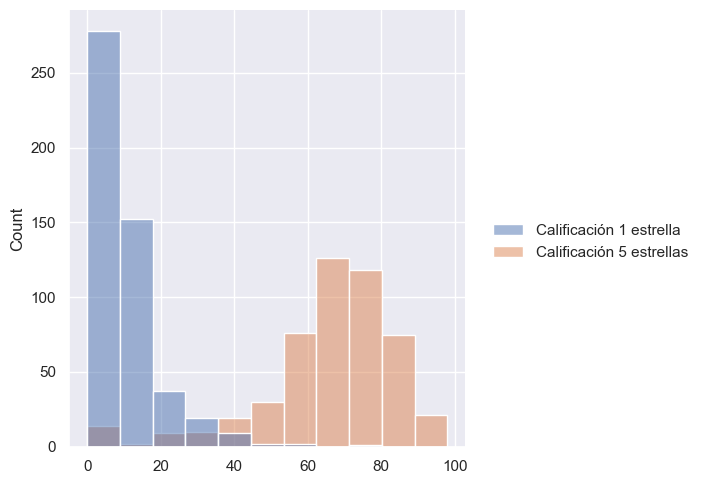

In [39]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.pltplot(cal_per_game[["Calificación 1 estrella","Calificación 5 estrellas"]]);

<Axes: xlabel='Calificación 1 estrella', ylabel='Calificación 5 estrellas'>

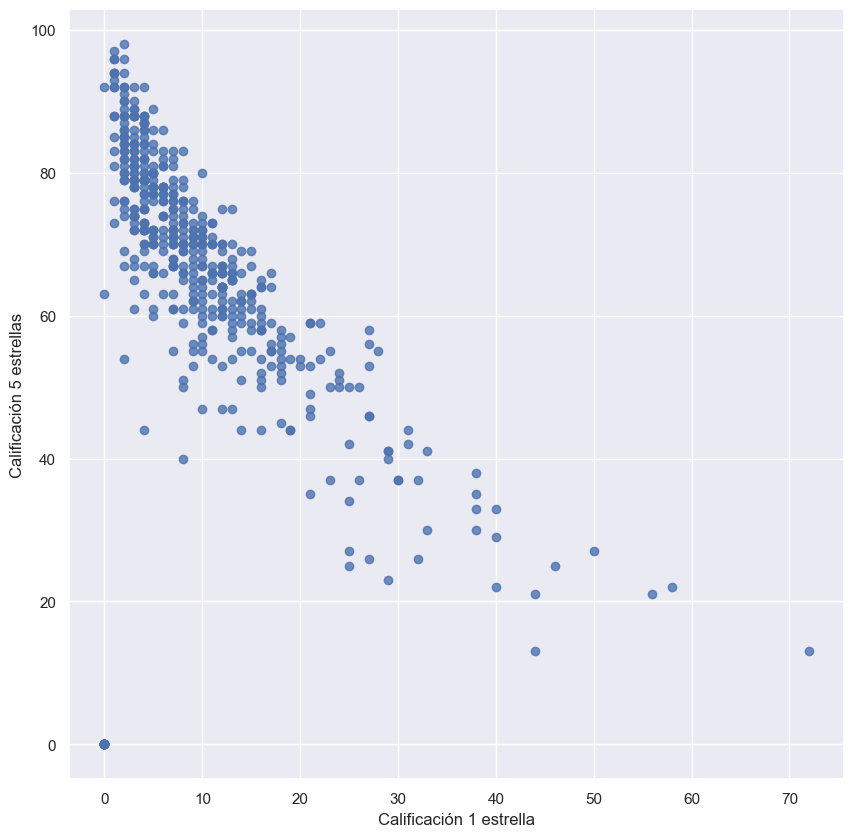

In [52]:
plt.figure(figsize=(10,10))
sns.regplot(x = "Calificación 1 estrella", y = "Calificación 5 estrellas", data=cal_per_game, fit_reg=False )